In [7]:
import numpy as np
import picklen
import matplotlib.pyplot as plt

In [8]:


data = pickle.load( open('/Users/arygout/Documents/aaStuff/computerVision/ExploreOpenCvDnn/videoDump.pkl', 'rb'))

In [9]:
data

{'measurement': array([   0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,
          26.5,   29.5,   33.5,   42.5,   54. ,   60.5,   70. ,   73. ,
          81. ,   89. ,  102.5,  111. ,  122. ,  126. ,  126. ,  141. ,
         141. ,  163. ,  170. ,  175. ,  187.5,  200. ,  207. ,  221. ,
         225. ,  232. ,  241.5,  258.5,  269. ,  273. ,  285. ,  292.5,
         304. ,  311. ,  321.5,  325. ,  330. ,  342.5,  355. ,  367. ,
         374.5,  377. ,  383. ,  400. ,  410.5,  420. ,  422. ,  428. ,
         440. ,  451. ,  460.5,  468.5,  472. ,  487.5,  496. ,  504.5,
         518. ,  522. ,  528. ,  541.5,  549.5,  559.5,  566. ,  571. ,
         581.5,  592. ,  602.5,  613. ,  613. ,  625. ,  634.5,  634.5,
         659. ,  659. ,  672.5,  681. ,  681. ,  703.5,  715. ,  720. ,
         724. ,  736.5,  746.5,  759.5,  769.5,  773.5,  779.5,  794.5,
         803. ,  812. ,  822. ,  827. ,  837. ,  848. ,  861.5,  866.5,
         874. ,  886. ,  896.5,  909. ,  917.5,  

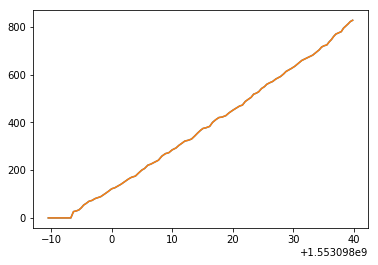

In [15]:
plt.plot(data['timeStamp'][:100],data['measurement'][:100], )
plt.plot(data['timeStamp'][:100],data['filterState'][:100][:,0], label = 'prediction')
plt.show()

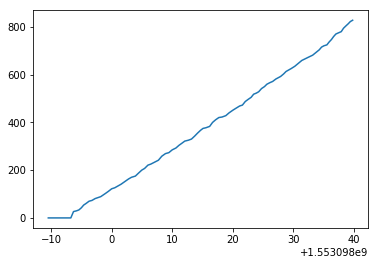

In [11]:
plt.plot(data['timeStamp'][:100],data['filterState'][:100][:,0])

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         2.,  1.,  1.,  0.,  0.,  0.,  0.,  2.,  1.,  1.,  0.,  1.,  0.,
         1.,  1.,  1.,  4.,  2.,  0.,  0.,  1.,  1.,  0.,  2.,  3.,  3.,
         4.,  5., 12.,  6.,  5.,  2.,  1.,  1.,  1.,  1.,  3.,  2.,  2.,
         5.,  0.,  1.,  0.,  3.,  2.,  2.,  0.,  1.,  1.,  2.,  1.,  0.,
         0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-0.50938488, -0.49996358, -0.49054229, -0.48112099, -0.4716997 ,
        -0.4622784 , -0.4528571 , -0.44343581, -0.43401451, -0.42459321,
        -0.41517192, -0.40575062, -0.39632933, -0.38690803, -0.37748673,
        -0.36806544, -0.35864414, -0.34922284, -0.33980155, -0.33038025,
        -0.32095896, -0.31153766, -0.30211636, -0.29269507, -0.28327377,
        -0.27385247, -0.26443118, -0.25500988, -0.24558859, -0.236167

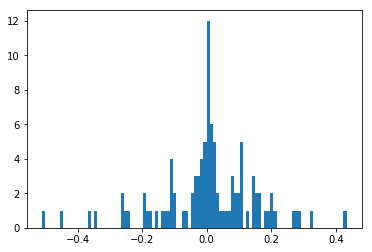

In [12]:
plt.hist(data['filterState'][:100][:,0] - data['measurement'][:100],100)

In [13]:
#Measurement too small, process too high

ValueError: x and y must have same first dimension, but have shapes (430,) and (100,)

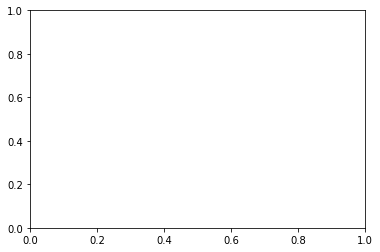

In [16]:
ts = data['timeStamp']

plt.plot(ts, data['filterState'][:100][:, 1], label = 'velocity pred')
plt.plot(ts[1:], np.diff(data['filterState'][:100][:, 0]), label = 'velocity finite diff')
plt.legend()
plt.show()